# 第2回 TSP, 近似解法, nearest neighbor algorithm

In [ ]:
C={}
n=100
import random
for i in range(n):
  x=random.randint(0,10000)
  y=random.randint(0,10000)
  C[i]=(x,y)
print(C)

: 

In [3]:
C = {0:(25,30),1:(15,25),2:(23,28),3:(9,29),4:(13,17),5:(12,23),6:(8,15),7:(1,27),8:(25,15),9:(13,28)}
print(C)

{0: (25, 30), 1: (15, 25), 2: (23, 28), 3: (9, 29), 4: (13, 17), 5: (12, 23), 6: (8, 15), 7: (1, 27), 8: (25, 15), 9: (13, 28)}


In [4]:
def distance(pa,pb):
  return ((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)**0.5

distance((0,0),(1,1))

1.4142135623730951

In [5]:
import networkx as nx
G=nx.Graph()
for c1 in C:
  for c2 in C:
    if c1 != c2:
      G.add_edge(c1,c2,weight=distance(C[c1],C[c2]))

T=nx.minimum_spanning_tree(G)
print(T.size(weight="weight"))

54.58630269587384


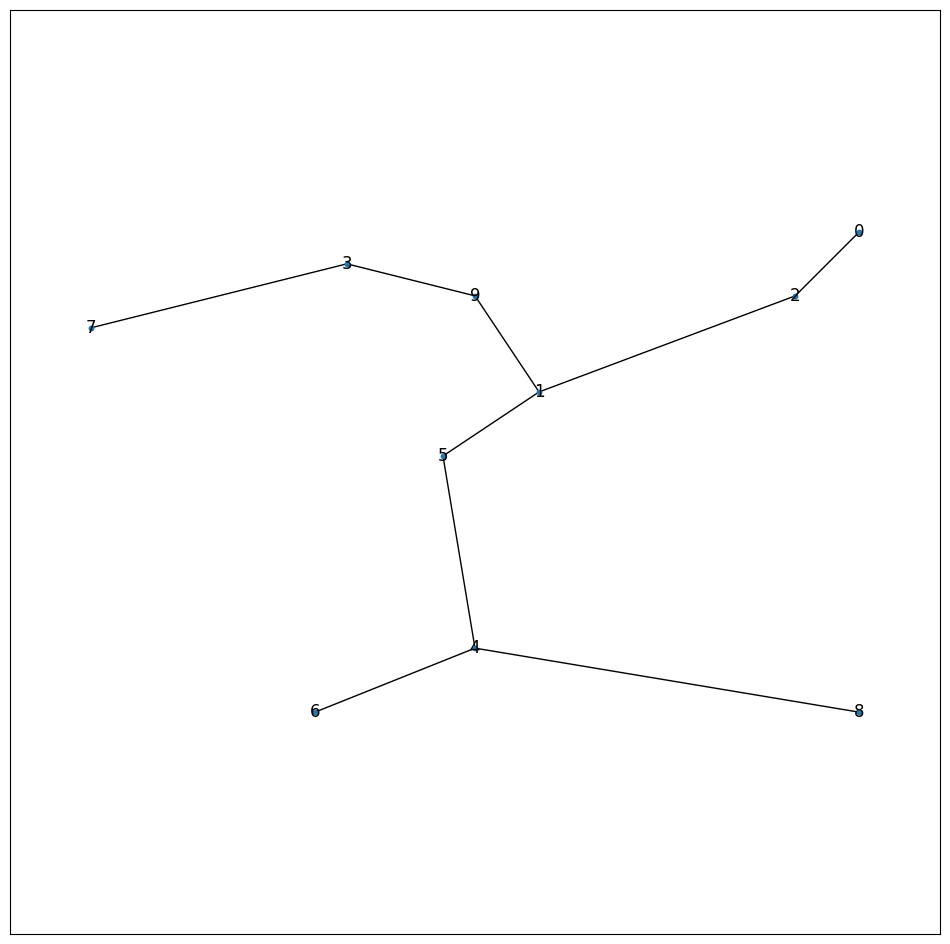

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.axis("equal")

nx.draw_networkx(T,pos=C,node_size=10,with_labels=True)

In [7]:
tour = [c for c in C]
# tour =[0,2,1,9,3,7,5,4,6,8]


print(tour)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
passed=[]
kinji_tour=[]
initial_node=0
passed.append(initial_node)

def get_next_node(current_node, passed_nodes):
    for neighbor in T.neighbors(current_node):
        if neighbor not in passed_nodes:
            return neighbor
    return None

get_next_node(0, passed)

def kinji(tour, C):
  current_node= initial_node
  while len(passed) != len(tour):
    print(len(passed),"回目の探索", passed)
    current_node = get_next_node(current_node, passed)
    if current_node is None:
      for i in range(len(passed)-2,0,-1):
        print(passed[i])
        back_node=passed[i]
        if get_next_node(back_node, passed) is not None:
          passed.append(get_next_node(back_node, passed))
          current_node=get_next_node(back_node, passed)
          break
    else:
      passed.append(current_node)


  return passed

# kinji(tour,C)

def graph_of_tour(tour,C):
  Gt=nx.Graph()
  for i in range(len(tour)):
    ci = tour[i]
    if i == len(tour)-1:
      cj = tour[0]
    else:
      cj = tour[i+1]

    Gt.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
  return Gt

Gt = graph_of_tour(tour,C)

132.01874835440344


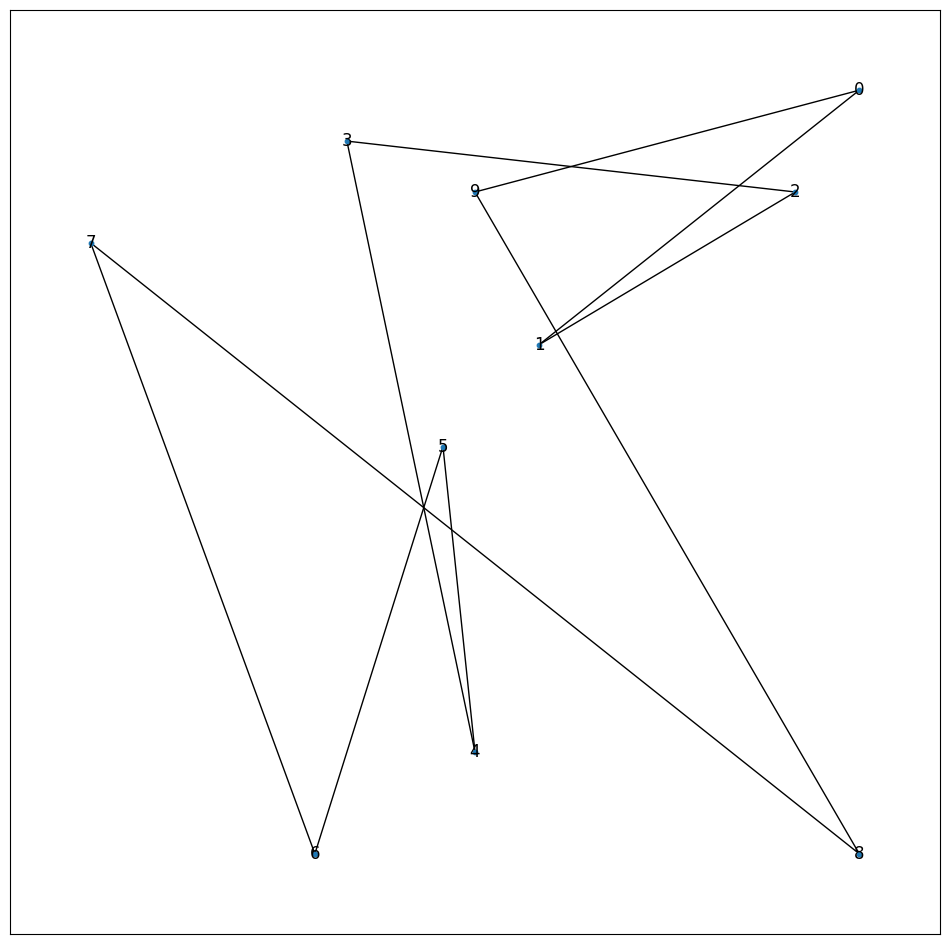

In [9]:
print(Gt.size(weight="weight"))

plt.figure(figsize=(12,12))
nx.draw_networkx(Gt,pos=C,node_size=10,with_labels=True)

## [課題3] 前回作成した1000都市のTSPに対して2近似アルゴリズムにより巡回路を求め描画せよ．また得られた巡回路の総移動距離と最小木を重みの実際の比率を示せ．


--- 2近似アルゴリズム ---
巡回路のノード順序: [0, 321, 317, 118, 874, 880, 380, 655, 621, 127, 216, 126, 481, 795, 154, 626, 996, 946, 616, 997, 465, 25, 144, 404, 533, 931, 731, 385, 929, 165, 449, 446, 709, 932, 779, 850, 245, 688, 732, 651, 630, 892, 820, 546, 870, 586, 100, 872, 689, 667, 132, 59, 224, 460, 314, 295, 868, 840, 152, 411, 611, 983, 288, 461, 116, 495, 891, 549, 476, 237, 155, 669, 294, 150, 241, 195, 523, 786, 552, 440, 376, 597, 950, 633, 209, 329, 885, 591, 583, 573, 39, 547, 336, 766, 249, 788, 450, 770, 799, 847, 606, 797, 831, 10, 424, 624, 862, 917, 101, 998, 239, 844, 373, 687, 347, 91, 217, 988, 938, 540, 587, 592, 635, 980, 833, 608, 32, 55, 273, 813, 860, 122, 787, 939, 507, 137, 218, 900, 512, 793, 332, 612, 724, 814, 313, 416, 4, 69, 369, 177, 432, 541, 28, 192, 641, 771, 304, 277, 957, 343, 867, 235, 24, 103, 977, 609, 703, 469, 821, 846, 804, 426, 130, 301, 911, 166, 173, 725, 51, 886, 447, 904, 961, 357, 505, 963, 501, 757, 857, 364, 425, 556, 133, 381, 79, 683, 258, 

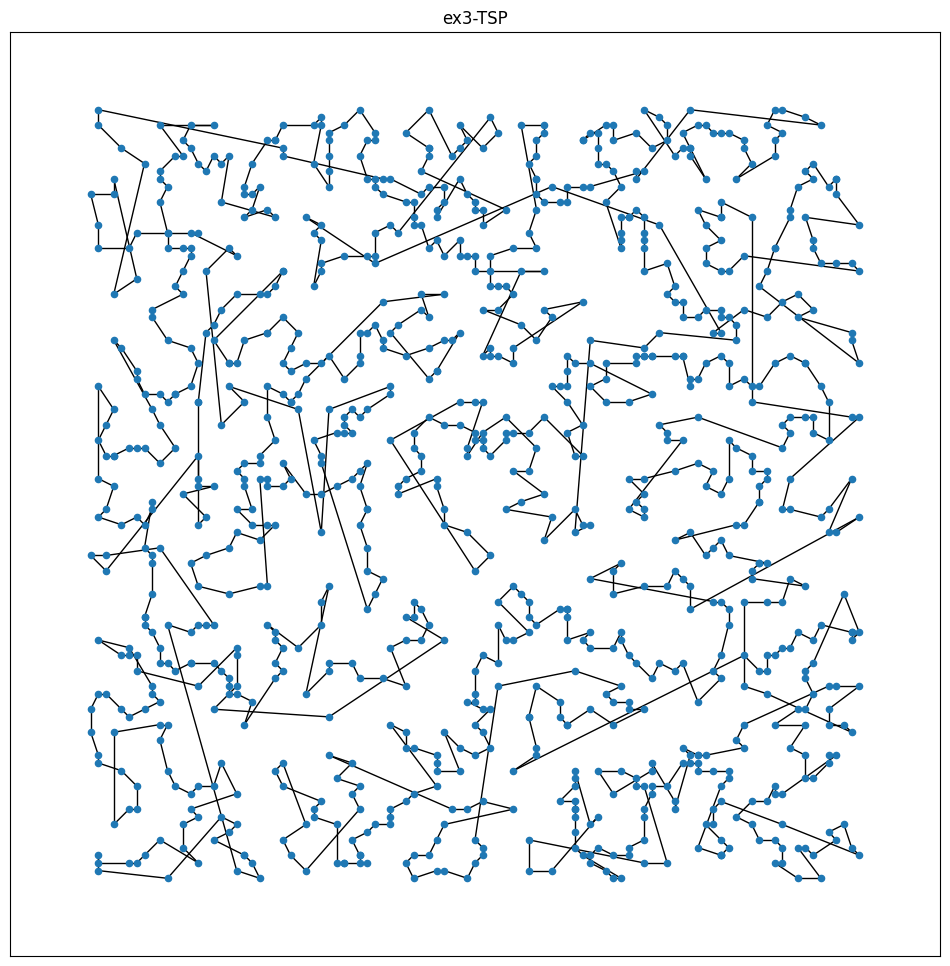

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

C = {}
n = 1000
for i in range(n):
    x = random.randint(0, 100)
    y = random.randint(0, 100)
    C[i] = (x, y)

G = nx.Graph()
for c1 in C:
    for c2 in C:
        if c1 != c2:
            G.add_edge(c1, c2, weight=distance(C[c1], C[c2]))
# 最小木を計算
T = nx.minimum_spanning_tree(G)

def dfs_traverse_for_tsp_tour(graph_mst, start_node):
    stack = [start_node]
    visited = {node: False for node in graph_mst.nodes()}
    tour_path = []

    while stack:
        current_node = stack.pop()

        if not visited[current_node]:
            visited[current_node] = True
            tour_path.append(current_node)

            for neighbor in reversed(list(graph_mst.neighbors(current_node))):
                if not visited[neighbor]:
                    stack.append(neighbor)

    tour_path.append(start_node)
    return tour_path

initial_node = list(T.nodes())[0]
approx_tour = dfs_traverse_for_tsp_tour(T, initial_node)

print("\n--- 2近似アルゴリズム ---")
print(f"巡回路のノード順序: {approx_tour}")

def calculate_tour_length(tour, coords):
    total_distance = 0
    for i in range(len(tour) - 1):
        u = tour[i]
        v = tour[i+1]
        total_distance += distance(coords[u], coords[v])
    return total_distance

tour_length = calculate_tour_length(approx_tour, C)
print(f"巡回路の総移動距離: {tour_length:.2f}")

def graph_of_tour(tour_list, coords_dict):
    Gt=nx.Graph()
    for i in range(len(tour_list) - 1):
        u = tour_list[i]
        v = tour_list[i+1]
        Gt.add_edge(u, v, weight=distance(coords_dict[u], coords_dict[v]))
    return Gt

Gt_approx = graph_of_tour(approx_tour, C)

plt.figure(figsize=(12, 12))
plt.axis("equal")
nx.draw_networkx(Gt_approx, pos=C,  node_size=20, with_labels=False, width=1.0, edge_color='black')
plt.title("ex3-TSP")
plt.show()

## [課題4] 前回作成した1000都市のTSPに対してnearest neighborアルゴリズムにより巡回路を求め描画せよ．


--- Nearest Neighbor アルゴリズム ---
巡回路のノード数: 1001
巡回路の先頭5ノード: [0, 961, 780, 218, 249]...
巡回路の総移動距離: 2812.07


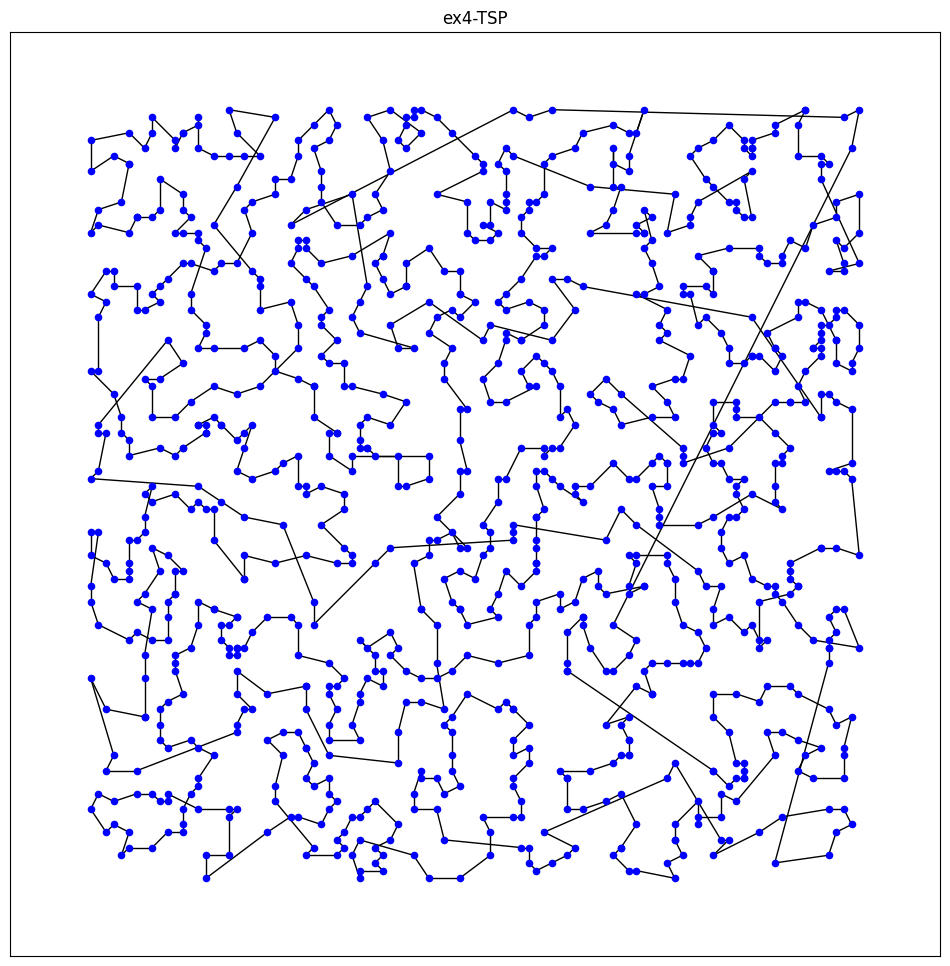

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

C = {}
n = 1000
random.seed(42)
for i in range(n):
    x = random.randint(0, 100)
    y = random.randint(0, 100)
    C[i] = (x, y)

def nearest_neighbor_tsp(coords):
    num_cities = len(coords)
    if num_cities == 0:
        return []

    start_node = 0

    tour = [start_node]
    visited = {start_node}

    current_node = start_node

    while len(visited) < num_cities:
        nearest_distance = float('inf')
        nearest_node = -1

        for neighbor_node, coord in coords.items():
            if neighbor_node not in visited:
                dist = distance(coords[current_node], coord)
                if dist < nearest_distance:
                    nearest_distance = dist
                    nearest_node = neighbor_node

        if nearest_node != -1:
            tour.append(nearest_node)
            visited.add(nearest_node)
            current_node = nearest_node
        else:
            break

    tour.append(start_node)
    return tour

def calculate_tour_length(tour, coords):
    total_distance = 0
    for i in range(len(tour) - 1):
        u = tour[i]
        v = tour[i+1]
        total_distance += distance(coords[u], coords[v])
    return total_distance

def graph_of_tour(tour_list, coords_dict):
    Gt=nx.Graph()
    for i in range(len(tour_list) - 1):
        u = tour_list[i]
        v = tour_list[i+1]
        Gt.add_edge(u, v, weight=distance(coords_dict[u], coords_dict[v]))
    return Gt

nn_tour = nearest_neighbor_tsp(C)

print("\n--- Nearest Neighbor アルゴリズム ---")
print(f"巡回路のノード数: {len(nn_tour)}")
print(f"巡回路の先頭5ノード: {nn_tour[:5]}...")

nn_tour_length = calculate_tour_length(nn_tour, C)
print(f"巡回路の総移動距離: {nn_tour_length:.2f}")

Gt_nn = graph_of_tour(nn_tour, C)

plt.figure(figsize=(12, 12))
plt.axis("equal")
nx.draw_networkx(
    Gt_nn,
    pos=C,
    node_size=20,
    with_labels=False,
    width=1.0,
    edge_color='black',
    node_color='blue'
)
plt.title("ex4-TSP")
plt.show()